# Unsupervised learning

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from IPython.display import clear_output

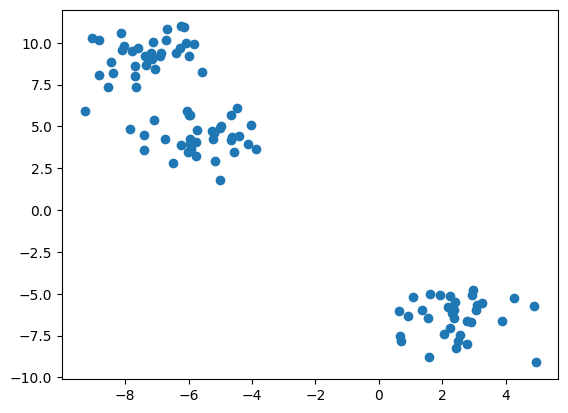

In [ ]:
X, y = make_blobs(n_samples=100, centers=3)
plt.scatter(X[:, 0], X[:, 1])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


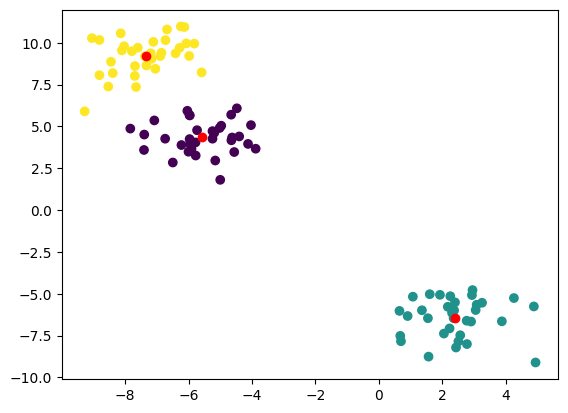

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100)
model.fit(X)
model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')

Text(0, 0.5, 'cout du model (inertia)')

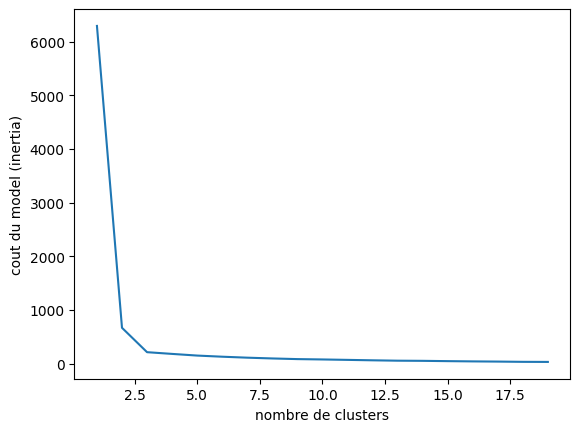

In [ ]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
clear_output(wait=False)

plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("cout du model (inertia)")

# tokenizer

In [ ]:
from tokenizers import ByteLevelBPETokenizer

In [ ]:
try :
  with open('/content/input.txt', 'r', encoding='utf-8') as f:
      text = f.read()
except:
  !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
  with open('input.txt', 'r', encoding='utf-8') as f:
      text = f.read()

--2024-01-30 15:22:23--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-01-30 15:22:23 (19.6 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
tokenizer = ByteLevelBPETokenizer()
tokenizer.train(files="input.txt", vocab_size=1000)
tokenizer.save_model('tokenizer_model')

['tokenizer_model/vocab.json', 'tokenizer_model/merges.txt']

In [ ]:
from transformers import RobertaTokenizerFast

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained('tokenizer_model')

In [ ]:
tokenizer("hello, how are you?")["input_ids"]

[1000, 257, 273, 78, 11, 629, 418, 288, 30, 1001]

In [ ]:
tokens = tokenizer("Bonjour")["input_ids"]

decode = []
for t in tokens:
    decode.append(tokenizer.decode(t))
print(decode)

['<s>', 'B', 'on', 'j', 'our', '</s>']


In [ ]:
vocab = tokenizer.vocab
vocab = sorted(vocab.items(), key=lambda t: t[1])
print(vocab)

[('!', 0), ('"', 1), ('#', 2), ('$', 3), ('%', 4), ('&', 5), ("'", 6), ('(', 7), (')', 8), ('*', 9), ('+', 10), (',', 11), ('-', 12), ('.', 13), ('/', 14), ('0', 15), ('1', 16), ('2', 17), ('3', 18), ('4', 19), ('5', 20), ('6', 21), ('7', 22), ('8', 23), ('9', 24), (':', 25), (';', 26), ('<', 27), ('=', 28), ('>', 29), ('?', 30), ('@', 31), ('A', 32), ('B', 33), ('C', 34), ('D', 35), ('E', 36), ('F', 37), ('G', 38), ('H', 39), ('I', 40), ('J', 41), ('K', 42), ('L', 43), ('M', 44), ('N', 45), ('O', 46), ('P', 47), ('Q', 48), ('R', 49), ('S', 50), ('T', 51), ('U', 52), ('V', 53), ('W', 54), ('X', 55), ('Y', 56), ('Z', 57), ('[', 58), ('\\', 59), (']', 60), ('^', 61), ('_', 62), ('`', 63), ('a', 64), ('b', 65), ('c', 66), ('d', 67), ('e', 68), ('f', 69), ('g', 70), ('h', 71), ('i', 72), ('j', 73), ('k', 74), ('l', 75), ('m', 76), ('n', 77), ('o', 78), ('p', 79), ('q', 80), ('r', 81), ('s', 82), ('t', 83), ('u', 84), ('v', 85), ('w', 86), ('x', 87), ('y', 88), ('z', 89), ('{', 90), ('|', 9

# Mixtral

In [ ]:
# fix numpy in colab import numpy from IPython.display import clear_output # fix triton in colab !export LC_ALL="en_US.UTF-8" !export LD_LIBRARY_PATH="/usr/lib64-nvidia" !export LIBRARY_PATH="/usr/local/cuda/lib64/stubs" !ldconfig /usr/lib64-nvidia !git clone https://github.com/dvmazur/mixtral-offloading.git --quiet !cd mixtral-offloading && pip install -q -r requirements.txt !huggingface-cli download lavawolfiee/Mixtral-8x7B-Instruct-v0.1-offloading-demo --quiet --local-dir Mixtral-8x7B-Instruct-v0.1-offloading-demo clear_output()

In [ ]:
import sys sys.path.append("mixtral-offloading")
import torch from torch.nn import functional as F
from hqq.core.quantize import BaseQuantizeConfig

from huggingface_hub import snapshot_download from IPython.display import clear_output
from tqdm.auto import trange from transformers import AutoConfig, AutoTokenizer
from transformers.utils import logging as hf_logging
from src.build_model import OffloadConfig, QuantConfig, build_model

SyntaxError: invalid syntax (<ipython-input-3-30173a2a176d>, line 1)